In [2]:
from deepcrypto.backtest import *
from deepcrypto.portfolio_analysis import *
from deepcrypto.data_utils.crawlers.bitfinex_kaggle import *
from talib.abstract import *
from pprint import pprint

In [7]:
def strategy(df, config):
    pmin = df["close"].rolling(config["range_period"]).min()
    pmax = df["close"].rolling(config["range_period"]).max()

    prange = pmax - pmin
    
    prange = prange.shift(config["range_period"])
    change = df["close"].diff(config["change_period"])
    
    std_signal = change > prange * config["k"]
    
    volume_signal = df["volume"].pct_change(config["volume_period"]) > config["volume_thres"]
    
    df["enter_long"] = std_signal & volume_signal
    df["time_cut"] = config["time_cut"]
    df["stop_loss"] = config["stop_loss"]
    df["take_profit"] = config["take_profit"]
    df["trade_cost"] = 0.001
    
    return df

In [8]:
def backtest_and_report(config, ticker):
    data = read_bitfinex_data("/home/ych/Storage/bitfinex/bitfinex.db", "1H", ticker)
    data = data.backtest.add_defaults()

    order, port = strategy(data, config).backtest()
    pprint(calc_from_order_df(order))
    qs.reports.full(port["portfolio_value"].resample("1D").last(), benchmark=port["open"].resample("1D").last())

In [9]:
DEFAULT_CONFIG = {'range_period': 12,
 'change_period': 12,
 'time_cut': 24,
 'stop_loss': 0.03,
 'take_profit': 0.15,
 'k': 1.5,
 'volume_period': 24,
 'volume_thres': 3}

backtest completed in 0.05847644805908203 seconds
{'bothside_avg_holding_bars': 17.969187675070028,
 'bothside_profit_factor': 1.8317538318742168,
 'bothside_total_profit': 592729.3961742658,
 'bothside_total_trades': 357,
 'bothside_win_rate': 48.4593837535014,
 'buyside_avg_holding_bars': 17.969187675070028,
 'buyside_profit_factor': 1.8317538318742168,
 'buyside_total_profit': 592729.3961742658,
 'buyside_total_trades': 357,
 'buyside_win_rate': 48.4593837535014,
 'sellside_avg_holding_bars': nan,
 'sellside_profit_factor': nan,
 'sellside_total_profit': 0.0,
 'sellside_total_trades': 0,
 'sellside_win_rate': nan}


/home/ych/PycharmProjects/DeepCrypto/deepcrypto/portfolio_analysis/__init__.py:7: RuntimeWarning: invalid value encountered in long_scalars
  a[f"{label}_win_rate"] = order_df.realized[order_df.realized >= 0].count()/order_df.realized.count() * 100


                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2016-03-09  2016-03-09
End Period                 2021-05-18  2021-05-18
Risk-Free Rate             0.0%        0.0%
Time in Market             30.0%       97.0%

Cumulative Return          4,674.70%   30,903.68%
CAGR%                      110.48%     201.73%

Sharpe                     1.68        1.3
Sortino                    3.79        2.05
Sortino/√2                 2.68        1.45

Max Drawdown               -22.63%     -93.85%
Longest DD Days            312         1101
Volatility (ann.)          33.91%      88.08%
R^2                        0.19        0.19
Calmar                     4.88        2.15
Skew                       3.46        0.37
Kurtosis                   24.29       5.46

Expected Daily %           0.2%        0.3%
Expected Monthly %         6.33%       9.53%
Expected Yearly %          90.47%      160.16%
Kelly Criterion            18.

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2019-04-06,2019-08-02,2020-02-12,312,-22.628802,-21.390979
2,2020-08-02,2020-10-20,2020-11-30,120,-18.973705,-17.156650
3,2019-01-03,2019-02-03,2019-03-29,85,-18.860693,-16.180999
4,2016-09-29,2016-12-22,2017-01-03,96,-17.921758,-15.360273
5,2018-09-27,2018-12-20,2019-01-02,97,-16.785278,-14.934012


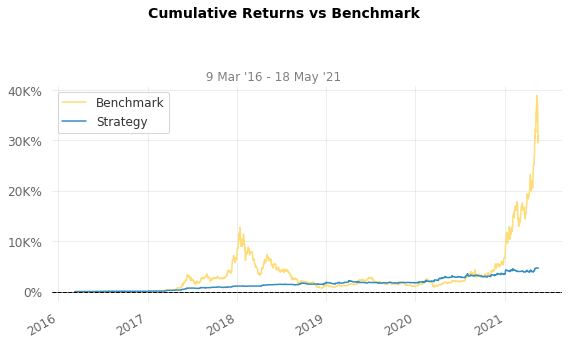

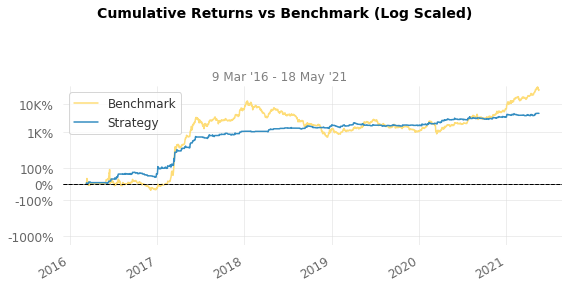

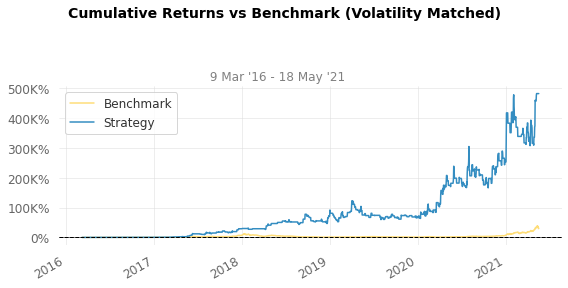

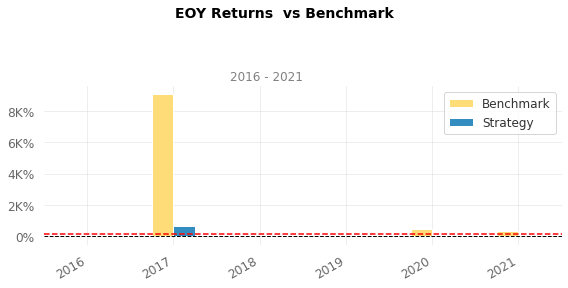

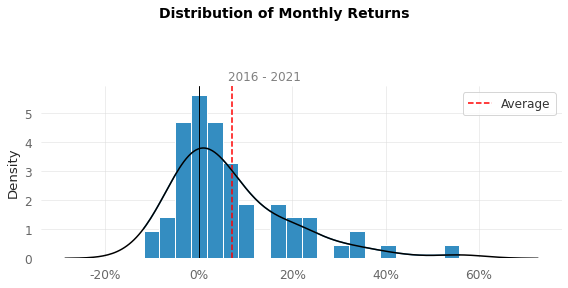

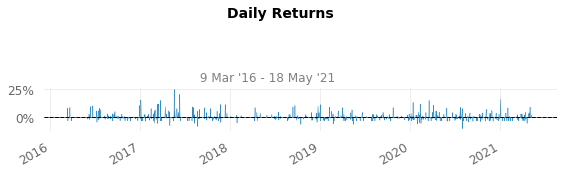

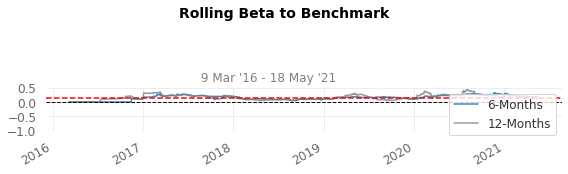

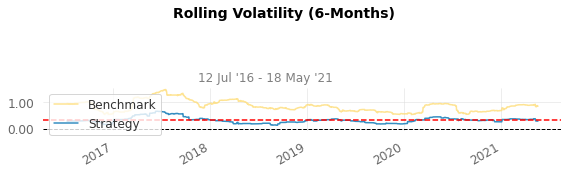

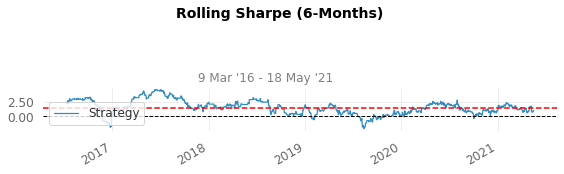

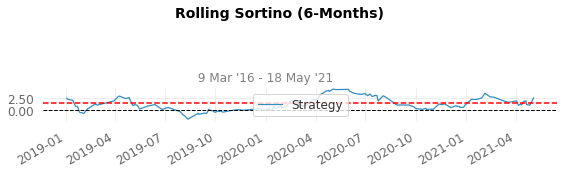

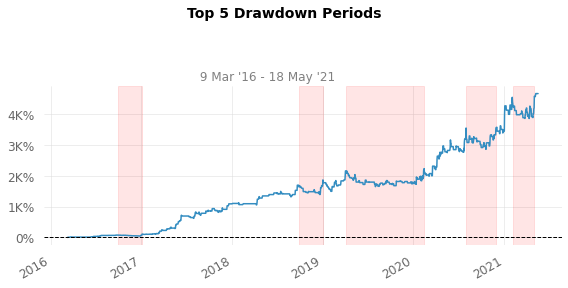

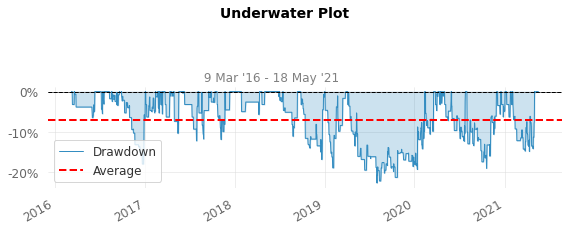

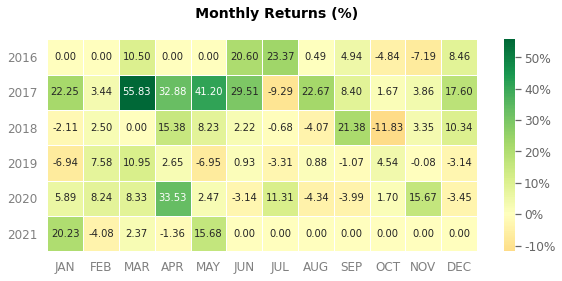

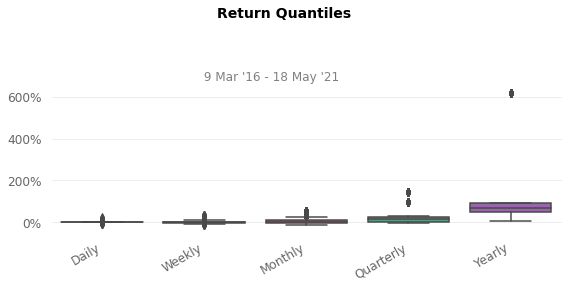

In [10]:
backtest_and_report(DEFAULT_CONFIG, "ETHUSD")

backtest completed in 0.09480667114257812 seconds
{'bothside_avg_holding_bars': 19.691756272401435,
 'bothside_profit_factor': 1.3868511616911114,
 'bothside_total_profit': 1132642.2982578059,
 'bothside_total_trades': 558,
 'bothside_win_rate': 54.3010752688172,
 'buyside_avg_holding_bars': 19.691756272401435,
 'buyside_profit_factor': 1.3868511616911114,
 'buyside_total_profit': 1132642.2982578059,
 'buyside_total_trades': 558,
 'buyside_win_rate': 54.3010752688172,
 'sellside_avg_holding_bars': nan,
 'sellside_profit_factor': nan,
 'sellside_total_profit': 0.0,
 'sellside_total_trades': 0,
 'sellside_win_rate': nan}


/home/ych/PycharmProjects/DeepCrypto/deepcrypto/portfolio_analysis/__init__.py:7: RuntimeWarning: invalid value encountered in long_scalars
  a[f"{label}_win_rate"] = order_df.realized[order_df.realized >= 0].count()/order_df.realized.count() * 100


                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2013-04-01  2013-04-01
End Period                 2021-05-18  2021-05-18
Risk-Free Rate             0.0%        0.0%
Time in Market             31.0%       96.0%

Cumulative Return          7,761.94%   42,377.88%
CAGR%                      71.01%      110.43%

Sharpe                     1.56        1.08
Sortino                    3.56        1.64
Sortino/√2                 2.52        1.16

Max Drawdown               -22.12%     -84.25%
Longest DD Days            391         1126
Volatility (ann.)          25.8%       70.08%
R^2                        0.15        0.15
Calmar                     3.21        1.31
Skew                       4.24        0.21
Kurtosis                   34.74       10.41

Expected Daily %           0.15%       0.2%
Expected Monthly %         4.55%       6.37%
Expected Yearly %          62.41%      95.89%
Kelly Criterion            16

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-05-17,2020-10-16,2020-12-17,214,-22.116291,-21.712990
2,2014-06-01,2014-11-07,2015-06-27,391,-18.326557,-16.900811
3,2021-01-29,2021-04-12,2021-05-18,109,-16.889917,-15.029435
4,2016-07-03,2016-11-08,2017-01-02,183,-14.696913,-14.251073
5,2018-10-24,2019-02-02,2019-04-03,161,-13.807520,-13.413589


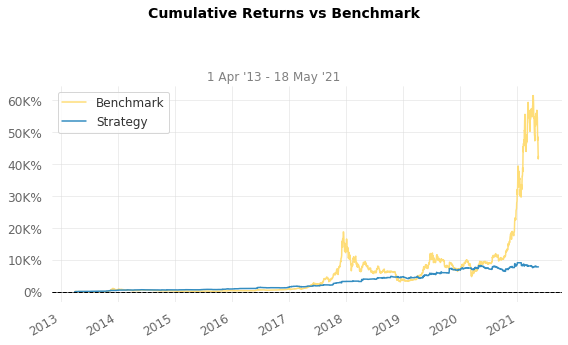

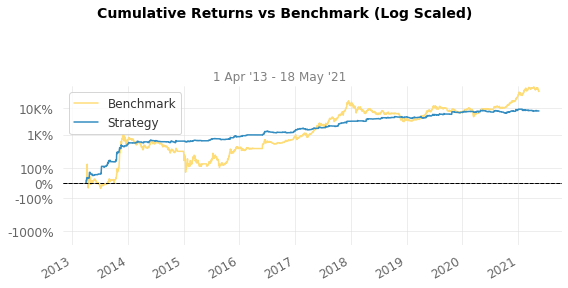

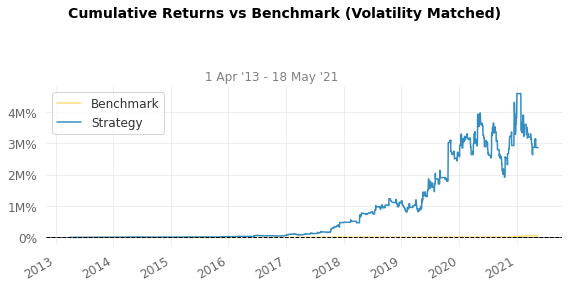

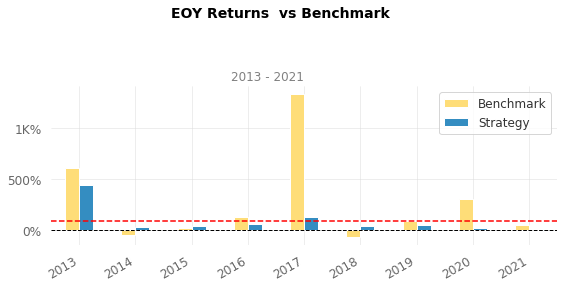

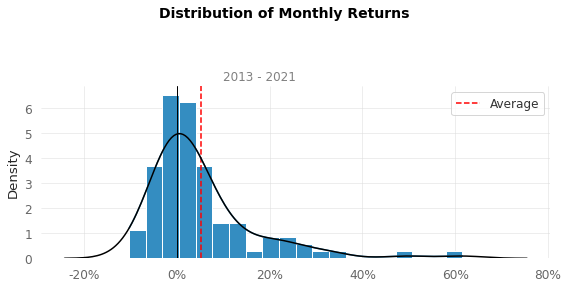

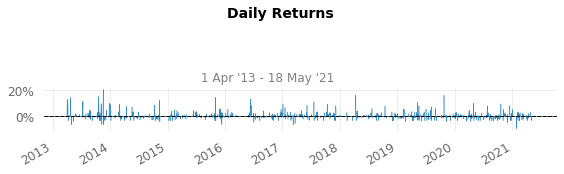

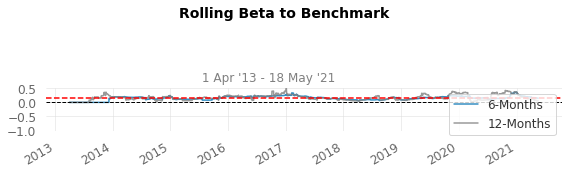

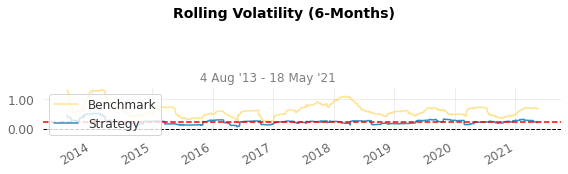

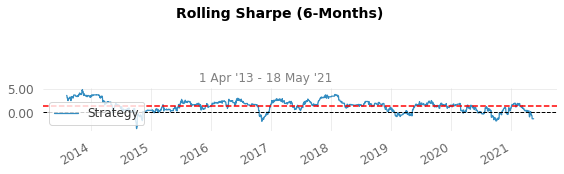

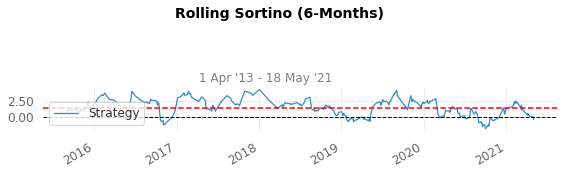

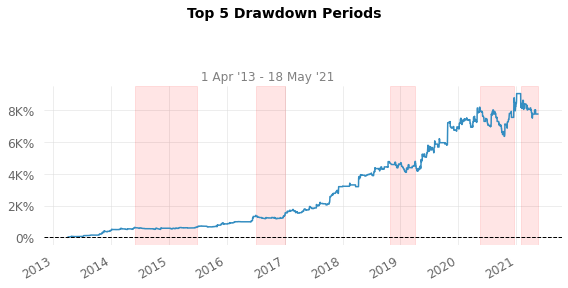

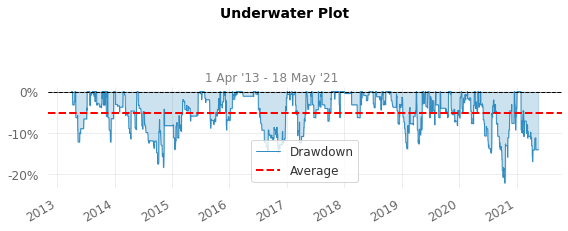

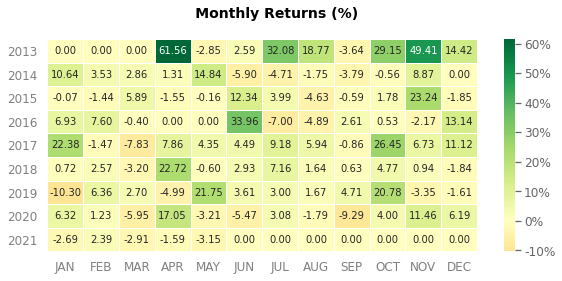

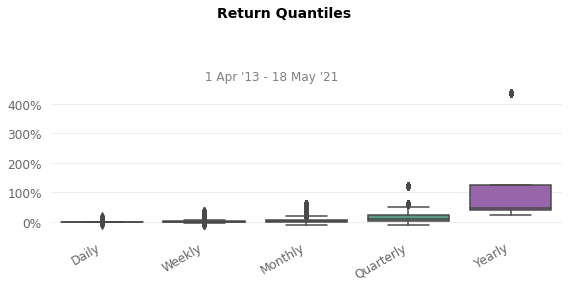

In [13]:
backtest_and_report(DEFAULT_CONFIG, "BTCUSD")

backtest completed in 0.04416656494140625 seconds
{'bothside_avg_holding_bars': 12.303206997084548,
 'bothside_profit_factor': 2.8637437781413544,
 'bothside_total_profit': 63326.711116694976,
 'bothside_total_trades': 343,
 'bothside_win_rate': 35.56851311953353,
 'buyside_avg_holding_bars': 12.303206997084548,
 'buyside_profit_factor': 2.8637437781413544,
 'buyside_total_profit': 63326.711116694976,
 'buyside_total_trades': 343,
 'buyside_win_rate': 35.56851311953353,
 'sellside_avg_holding_bars': nan,
 'sellside_profit_factor': nan,
 'sellside_total_profit': 0.0,
 'sellside_total_trades': 0,
 'sellside_win_rate': nan}


/home/ych/PycharmProjects/DeepCrypto/deepcrypto/portfolio_analysis/__init__.py:7: RuntimeWarning: invalid value encountered in long_scalars
  a[f"{label}_win_rate"] = order_df.realized[order_df.realized >= 0].count()/order_df.realized.count() * 100


                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2017-05-19  2017-05-19
End Period                 2021-05-18  2021-05-18
Risk-Free Rate             0.0%        0.0%
Time in Market             29.0%       100.0%

Cumulative Return          507.06%     380.69%
CAGR%                      56.97%      48.07%

Sharpe                     0.88        0.76
Sortino                    2.0         1.38
Sortino/√2                 1.41        0.98

Max Drawdown               -46.57%     -95.05%
Longest DD Days            463         1229
Volatility (ann.)          46.23%      116.08%
R^2                        0.21        0.21
Calmar                     1.22        0.51
Skew                       5.3         2.84
Kurtosis                   54.8        25.94

Expected Daily %           0.12%       0.11%
Expected Monthly %         3.75%       3.26%
Expected Yearly %          43.43%      36.89%
Kelly Criterion            12.

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2017-07-09,2017-12-19,2018-10-15,463,-46.572449,-42.985196
2,2021-01-31,2021-03-08,2021-04-10,69,-35.873963,-34.994154
3,2019-01-06,2019-03-31,2019-05-15,129,-23.595204,-22.837320
4,2019-09-19,2020-01-05,2020-03-27,190,-23.361172,-23.131691
5,2020-11-24,2020-12-16,2021-01-30,67,-17.794971,-14.995076


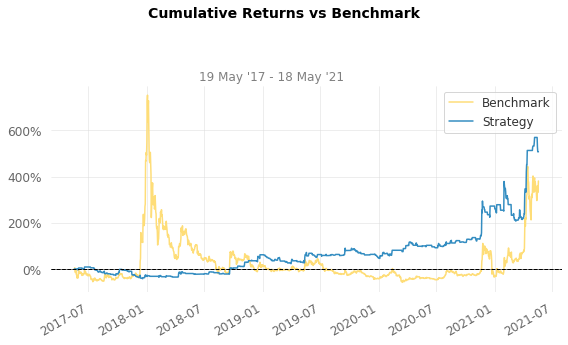

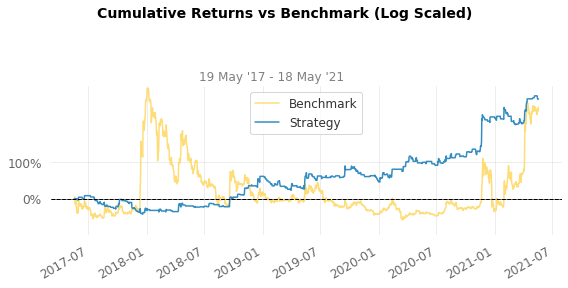

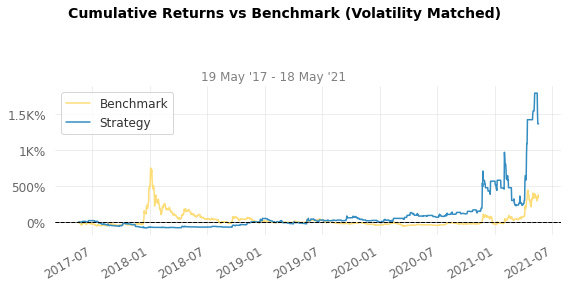

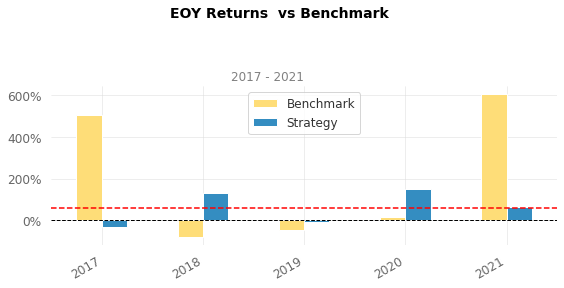

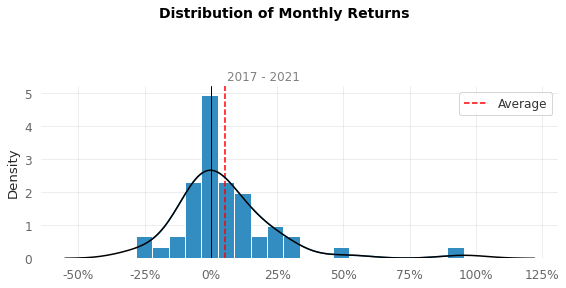

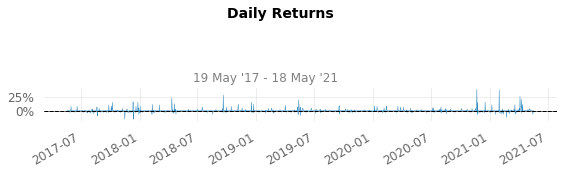

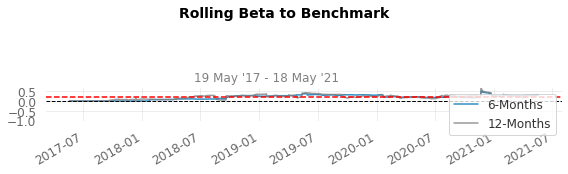

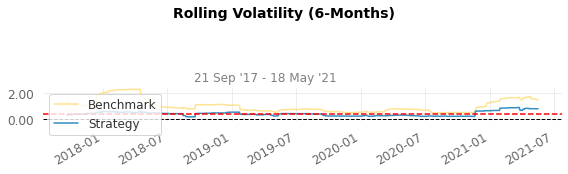

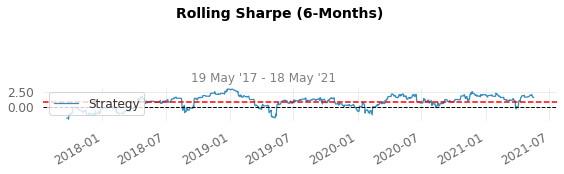

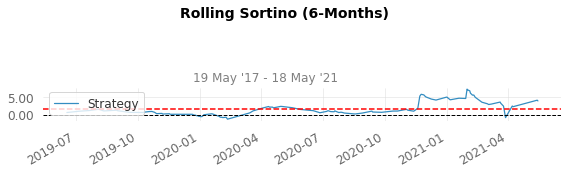

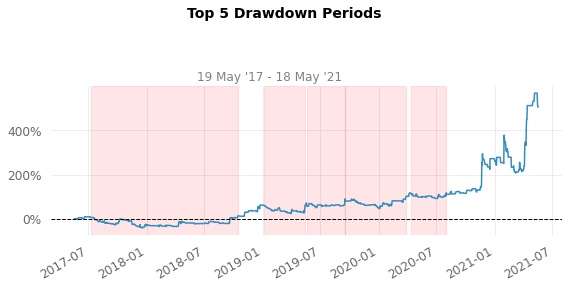

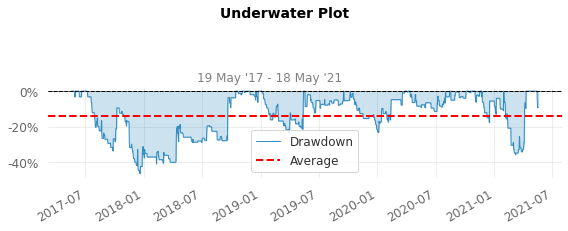

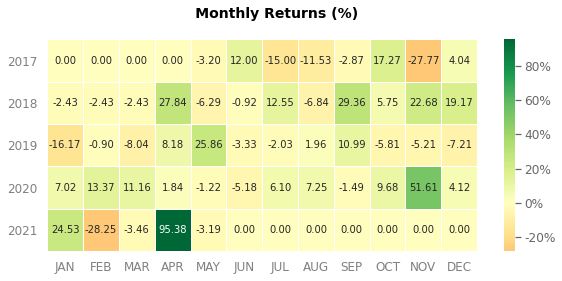

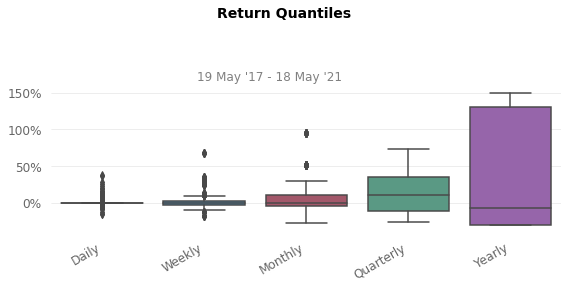

In [15]:
backtest_and_report(DEFAULT_CONFIG, "XRPUSD")

In [5]:
import ray
from ray import tune
def optimizer(config, df):
    df = df.copy()
    order_df, port_df = run_backtest_df(strategy(df, config))
    tune.report(sortino=qs.stats.sortino(port_df["portfolio_value"].resample("1D").last()))

def optimize(df):
    result = tune.run(
        tune.with_parameters(optimizer, df=df),
        config = {
            "range_period" : tune.grid_search([12, 24, 48]),
            "change_period" : tune.grid_search([12, 24, 48]),
            "time_cut" : tune.grid_search([12, 24]),
            "stop_loss" : tune.grid_search([0.03, 0.05]),
            "take_profit" : tune.grid_search([0.1, 0.15]),
            "k" : tune.grid_search([0.7, 1.2, 1.5, 2]),
            "volume_period" : tune.grid_search([6, 12, 24]),
            "volume_thres" : tune.grid_search([3, 5, 7]),
        },
        local_dir="./ray_results",
    )
    return result

/home/ych/anaconda3/envs/DeepCrypto/lib/python3.7/site-packages/ray/autoscaler/_private/cli_logger.py:61: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  "update your install command.", FutureWarning)


In [6]:
ray.init()

2021-05-26 00:53:24,077	INFO services.py:1269 -- View the Ray dashboard at http://127.0.0.1:8266


{'node_ip_address': '192.168.68.106',
 'raylet_ip_address': '192.168.68.106',
 'redis_address': '192.168.68.106:24238',
 'object_store_address': '/tmp/ray/session_2021-05-26_00-53-22_962910_102062/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2021-05-26_00-53-22_962910_102062/sockets/raylet',
 'webui_url': '127.0.0.1:8266',
 'session_dir': '/tmp/ray/session_2021-05-26_00-53-22_962910_102062',
 'metrics_export_port': 54495,
 'node_id': '76505898c30c7ce6cd18b526a7ea9dd9650a8590967df6b10c3b28f8'}

In [7]:
data = read_bitfinex_data("/home/ych/Storage/bitfinex/bitfinex.db", "1H", "BTCUSD")
data = data.backtest.add_defaults()

In [8]:
data = data[:int(data.index.__len__() * 0.7)]

In [ ]:
result = optimize(data)

In [11]:
result.get_best_config("sortino", mode="max")

{'range_period': 12,
 'change_period': 12,
 'time_cut': 24,
 'stop_loss': 0.03,
 'take_profit': 0.15,
 'k': 1.5,
 'volume_period': 24,
 'volume_thres': 3}